In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 13.7 MB/s 
     |████████████████████████████████| 944 kB 30.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
!pip install holidays_es

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from sqlalchemy import create_engine
import seaborn as sns
from datetime import timedelta, date, datetime
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from holidays_es import Province
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
from google.colab import files
import io
uploaded = files.upload()

Saving Global DataBase3.csv to Global DataBase3.csv
Saving Global DataBase2 daily.csv to Global DataBase2 daily.csv


In [5]:
df1=pd.read_csv(io.BytesIO(uploaded['Global DataBase2 daily.csv']), index_col='datetime_per_day', parse_dates=True, dayfirst = True)

df2=pd.read_csv(io.BytesIO(uploaded['Global DataBase3.csv']), index_col='datetime', parse_dates=True, dayfirst = True)


df1 = df1.loc['2017-01-01':'2022-02-28']
df2 = df2.loc['2017-01-01':'2022-02-28']

index = pd.date_range(start='2017-01-01', end='2022-02-28', freq="1d")
columns = ["datetime_per_week", 'Price - PT [€/MWh]','Price - ES [€/MWh]','Actual Consumption (MWh)','Biomass AA','Fossil Gas AA','Fossil Hard Coal AC', 'Hydro Pumped Storage AA','Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA','Hydro Water Reservoir AA', 'Other AA', 'Solar AA','Wind Onshore AA','Electricity Consumption (MWh)']

df = pd.DataFrame(np.nan, index=range(0,index.size), columns=columns)
df["datetime_per_week"] = index
df.set_index("datetime_per_week", inplace=True)

df = df.resample("W").mean()


columns1 = ['Electricity Consumption (MWh)']
for column in columns1 : 
    df[column] = df2[column].resample("W").sum()
columns2=['Price - PT [€/MWh]','Price - ES [€/MWh]','Actual Consumption (MWh)','Biomass AA','Fossil Gas AA','Fossil Hard Coal AC', 'Hydro Pumped Storage AA','Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA','Hydro Water Reservoir AA', 'Other AA', 'Solar AA','Wind Onshore AA']
for column in columns2 : 
    df[column] = df2[column].resample("W").mean()
df = df.sort_index()
   
df = df.dropna()


In [6]:
df = df.loc[:"2021-01-01 00:00:00"]

In [7]:
df.drop(['Price - ES [€/MWh]'],  axis=1, inplace=True )
df.drop(['Actual Consumption (MWh)'],  axis=1, inplace=True )
df

,Price - PT [€/MWh],Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh)
datetime_per_week,,,,,,,,,,,,
2017-01-01,51.421739,351.652174,1138.826087,0.000000,137.173913,402.086957,405.695652,80.652174,40.000000,56.608696,651.478261,112128
2017-01-08,63.972024,348.821429,1986.827381,3.250000,451.315476,313.363095,612.476190,216.642857,39.976190,49.773810,1461.738095,825818
2017-01-15,68.312143,316.130952,1650.386905,0.630952,508.035714,287.630952,651.166667,202.613095,38.702381,76.750000,1826.321429,825818
2017-01-22,77.764583,342.244048,2164.500000,0.000000,322.136905,198.458333,682.880952,237.970238,38.958333,80.875000,1414.500000,825818
2017-01-29,78.659405,344.119048,1980.952381,0.000000,266.226190,191.904762,749.309524,358.755952,40.761905,60.089286,1445.279762,825818
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-29,48.273155,394.333333,2711.750000,5.470238,352.541667,65.142857,1010.946429,521.672619,25.940476,81.833333,1330.940476,825818
2020-12-06,47.032440,394.946429,2225.339286,16.517857,370.630952,145.029762,1025.464286,505.386905,32.172619,100.351190,1949.517857,825818
2020-12-13,39.035774,395.976190,1051.327381,13.714286,538.898810,361.023810,882.386905,502.351190,33.851190,42.434524,2789.636905,825818


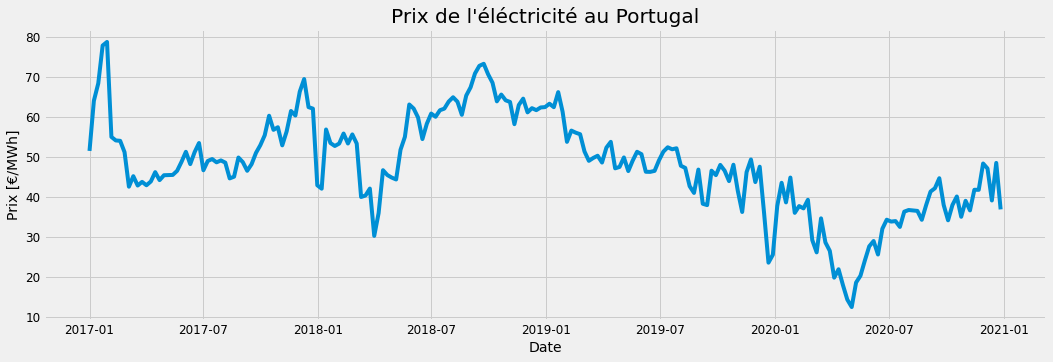

In [8]:
plt.figure(figsize=(16,5))
plt.gca().set(title="Prix de l'éléctricité au Portugal", xlabel='Date', ylabel='Prix [€/MWh]')
plt.plot(df.index, df['Price - PT [€/MWh]']) 
plt.show()

In [9]:
#Détecter les valeurs négatives  => y a pas 
df.describe()

,Price - PT [€/MWh],Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh)
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,47.975636,319.930012,1852.716814,6.821144,341.281135,223.226122,667.571055,262.600665,42.845352,113.859913,1413.406595,822403.215311
std,12.287424,52.543910,593.372065,5.513540,176.173943,111.619322,477.015822,207.659726,27.960195,41.505424,599.181795,49366.969572
min,12.396012,170.303571,548.494048,0.000000,91.726190,6.386905,100.202381,31.916667,10.946429,29.922619,397.940476,112128.000000
25%,40.920833,302.898810,1442.416667,1.619048,223.226190,155.815476,307.375000,114.077381,29.232143,80.250000,966.077381,825818.000000
50%,48.111071,327.714286,1910.821429,7.773810,304.339286,203.630952,540.886905,194.160714,34.148810,113.446429,1330.940476,825818.000000
75%,55.763988,352.017857,2296.708333,10.595238,413.529762,289.458333,870.011905,337.434524,39.976190,138.744048,1753.720238,825818.000000
max,78.659405,411.190476,3069.446429,26.023810,1303.267857,633.357143,2298.333333,1035.095238,154.357143,211.571429,3159.958333,825818.000000


In [10]:
#Données manquntes  

df.isnull().values.any()

False

In [11]:
#Ajout des attributs supplémentaires  : Mois, type du jour, jour férié

def add_extra_attributes(df): 
    holidays= []
    holidays.append(Province(name="malaga",year=2017).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2017).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2017).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2018).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2018).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2018).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2019).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2019).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2019).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2020).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2020).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2020).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2021).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2021).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2021).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2022).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2022).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2022).holidays().get('regional_holidays'))
    
    holidays_dates=[]
    for i in range (len(holidays)):
        for j in range (len(holidays[i])):
            holidays_dates.append(holidays[i][j])
    df_holidays=pd.DataFrame({'Holidays': holidays_dates})

    df['holiday'] =0
    df['weekday']=0
    df['month']=0

    for i in range (len(df.index)):
        if (df.index[i].weekday() == 5 or df.index[i].weekday() == 6):
            df['weekday'][i]=1
        df['month'][i]= df.index[i].month
            
        for j in range (len(df_holidays)):
            if (df.index[i] == df_holidays['Holidays'][j]):
                df['holiday'][i]=1
    return df      


df_extra=add_extra_attributes(df)

In [12]:
df=df_extra[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)','holiday','weekday','month','Price - PT [€/MWh]']].dropna()

df

,Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh),holiday,weekday,month,Price - PT [€/MWh]
datetime_per_week,,,,,,,,,,,,,,,
2017-01-01,351.652174,1138.826087,0.000000,137.173913,402.086957,405.695652,80.652174,40.000000,56.608696,651.478261,112128,0,1,1,51.421739
2017-01-08,348.821429,1986.827381,3.250000,451.315476,313.363095,612.476190,216.642857,39.976190,49.773810,1461.738095,825818,0,1,1,63.972024
2017-01-15,316.130952,1650.386905,0.630952,508.035714,287.630952,651.166667,202.613095,38.702381,76.750000,1826.321429,825818,0,1,1,68.312143
2017-01-22,342.244048,2164.500000,0.000000,322.136905,198.458333,682.880952,237.970238,38.958333,80.875000,1414.500000,825818,0,1,1,77.764583
2017-01-29,344.119048,1980.952381,0.000000,266.226190,191.904762,749.309524,358.755952,40.761905,60.089286,1445.279762,825818,0,1,1,78.659405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-29,394.333333,2711.750000,5.470238,352.541667,65.142857,1010.946429,521.672619,25.940476,81.833333,1330.940476,825818,0,1,11,48.273155
2020-12-06,394.946429,2225.339286,16.517857,370.630952,145.029762,1025.464286,505.386905,32.172619,100.351190,1949.517857,825818,0,1,12,47.032440
2020-12-13,395.976190,1051.327381,13.714286,538.898810,361.023810,882.386905,502.351190,33.851190,42.434524,2789.636905,825818,0,1,12,39.035774


In [13]:
from pylab import rcParams

def eval_model(train_y, pred_ytrain, test_y, pred_y, model, att):
    rcParams['figure.figsize'] = 14, 6

    scores = [[ metrics.mean_absolute_error(train_y, pred_ytrain),  np.sqrt(metrics.mean_squared_error(train_y, pred_ytrain)), np.sqrt(metrics.mean_squared_error(train_y, pred_ytrain))/train_y.mean()],
    [ metrics.mean_absolute_error(test_y, pred_y),  np.sqrt(metrics.mean_squared_error(test_y, pred_y)), np.sqrt(metrics.mean_squared_error(test_y, pred_y))/test_y.mean()]]

    labels = ['MAE', 'RMSE', 'CV']

    p = np.arange(len(labels))

    width = 0.25

    fig, ax = plt.subplots()

    rects1 = ax.bar(p - width/2, scores[0], width, label='Train')
    rects2 = ax.bar(p + width/2, scores[1], width, label='Test')

    ax.set_title( model + ' Model - ' + att + ' attribute selection')
    ax.set_xticks(p)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show() 

In [14]:
def print_results(train_y, pred_ytrain, test_y, pred_y, exec_time):
    print('************* Train results *************')

    print('Mean Absolute Error:', '%.5f' %  metrics.mean_absolute_error(train_y, pred_ytrain))
    print('Root Mean Squared Error:','%.5f' %  np.sqrt(metrics.mean_squared_error(train_y, pred_ytrain)))
    print('Coefficient of Variance:', '%.5f' %  ((np.sqrt(metrics.mean_squared_error(train_y, pred_ytrain))/train_y.mean())*100))

    print('************* Test results *************')

    print('Mean Absolute Error:', '%.5f' % metrics.mean_absolute_error(test_y, pred_y))
    print('Root Mean Squared Error:', '%.5f' % np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
    print('Coefficient of Variance:', '%.5f' % ((np.sqrt(metrics.mean_squared_error(test_y, pred_y))/test_y.mean())*100))
    print('R2' , '%.5f' % metrics.r2_score(train_y, pred_ytrain))

    print('****************************************')
    print('Execution Time:', '%.5f' %  exec_time)

### XGBRegressor

In [15]:
import xgboost as xgb

X = df.values[:, :-1] #Features
y = df.values[:, -1] #output

xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X, y)

feature_names = np.array(df[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month']].columns)
sfs_forward = SequentialFeatureSelector(xgbr, n_features_to_select=7, direction='forward').fit(X, y)
print("Features selected by forward sequential selection: "  f"{feature_names[sfs_forward.get_support()]}")
sfs_backward = SequentialFeatureSelector(xgbr, n_features_to_select=7, direction='backward').fit(X, y)
print("Features selected by backward sequential selection: "  f"{feature_names[sfs_backward.get_support()]}")

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15)

xgbr = xgb.XGBRegressor(verbosity=0)
start_time = time.time()
xgbr.fit(xtrain, ytrain)
exec_time = time.time()-start_time

ypredtr = xgbr.predict(xtrain)
ypredts = xgbr.predict(xtest)
print_results(ytrain, ypredtr, ytest, ypredts, exec_time)

Features selected by forward sequential selection: ['Fossil Hard Coal AC' 'Hydro Pumped Storage AC' 'Other AA'
 'Electricity Consumption (MWh)' 'holiday' 'weekday' 'month']
Features selected by backward sequential selection: ['Biomass AA' 'Fossil Gas AA' 'Fossil Hard Coal AC'
 'Hydro Pumped Storage AC' 'Other AA' 'Wind Onshore AA' 'month']
************* Train results *************
Mean Absolute Error: 1.17052
Root Mean Squared Error: 1.57861
Coefficient of Variance: 3.24435
************* Test results *************
Mean Absolute Error: 5.51750
Root Mean Squared Error: 7.56281
Coefficient of Variance: 17.10821
R2 0.98310
****************************************
Execution Time: 0.02712


In [16]:
X = sfs_backward.transform(X) 

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15)

xgbr = xgb.XGBRegressor(verbosity=0)
start_time = time.time()
xgbr.fit(xtrain, ytrain)
exec_time = time.time()-start_time

ypredtr = xgbr.predict(xtrain)
ypredts = xgbr.predict(xtest)
print_results(ytrain, ypredtr, ytest, ypredts, exec_time)

************* Train results *************
Mean Absolute Error: 1.67413
Root Mean Squared Error: 2.22466
Coefficient of Variance: 4.60026
************* Test results *************
Mean Absolute Error: 3.98374
Root Mean Squared Error: 5.06806
Coefficient of Variance: 11.05292
R2 0.96556
****************************************
Execution Time: 0.02760


### MLR

In [17]:
X = df.values[:, :-1] #Features
y = df.values[:, -1] #output

#Normalisation
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [18]:
reg=linear_model.LinearRegression()
reg.fit(X, y)

feature_names = np.array(df[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month']].columns)
sfs_forward = SequentialFeatureSelector(reg, n_features_to_select=7, direction='forward').fit(X, y)
print("Features selected by forward sequential selection: "  f"{feature_names[sfs_forward.get_support()]}")
sfs_backward = SequentialFeatureSelector(reg, n_features_to_select=7, direction='backward').fit(X, y)
print("Features selected by backward sequential selection: "  f"{feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection: ['Biomass AA' 'Fossil Hard Coal AC' 'Hydro Pumped Storage AA'
 'Hydro Pumped Storage AC' 'Solar AA' 'holiday' 'weekday']
Features selected by backward sequential selection: ['Biomass AA' 'Hydro Pumped Storage AA' 'Hydro Pumped Storage AC'
 'Hydro Run-of-river and poundage AA' 'Solar AA' 'Wind Onshore AA'
 'weekday']


In [19]:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.2)

reg = linear_model.LinearRegression()

start_time = time.time()
model = reg.fit(train_X, train_y)
exec_time = time.time()-start_time
pred_y = model.predict(test_X)
pred_ytrain = model.predict(train_X)

In [20]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 5.95418
Root Mean Squared Error: 7.50018
Coefficient of Variance: 15.65372
************* Test results *************
Mean Absolute Error: 5.81096
Root Mean Squared Error: 7.29042
Coefficient of Variance: 15.11771
R2 0.61889
****************************************
Execution Time: 0.00126


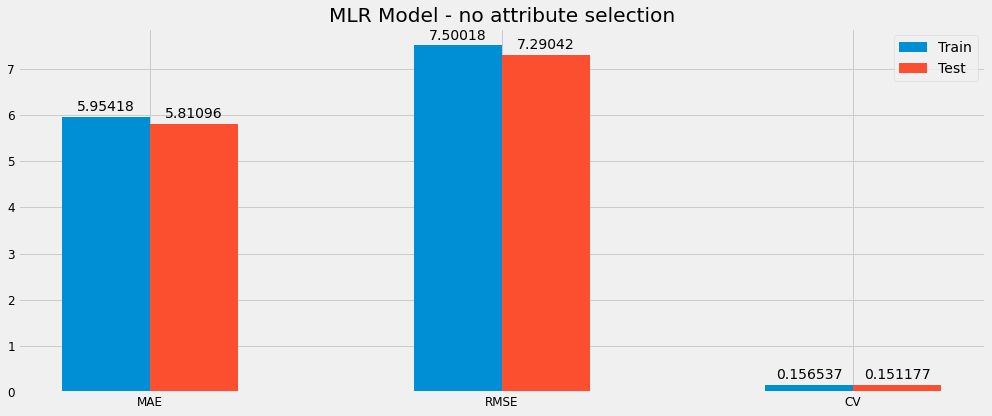

In [21]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "MLR", "no")

#### Selection d'attributs

In [22]:
#Features selection 
X = sfs_backward.transform(X) 

train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.2)

reg = linear_model.LinearRegression()

start_time = time.time()
model = reg.fit(train_X, train_y)
exec_time = time.time()-start_time
pred_y = model.predict(test_X)
pred_ytrain = model.predict(train_X)

In [23]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 5.57323
Root Mean Squared Error: 7.24442
Coefficient of Variance: 15.13009
************* Test results *************
Mean Absolute Error: 7.23855
Root Mean Squared Error: 9.35893
Coefficient of Variance: 19.35568
R2 0.63537
****************************************
Execution Time: 0.00111


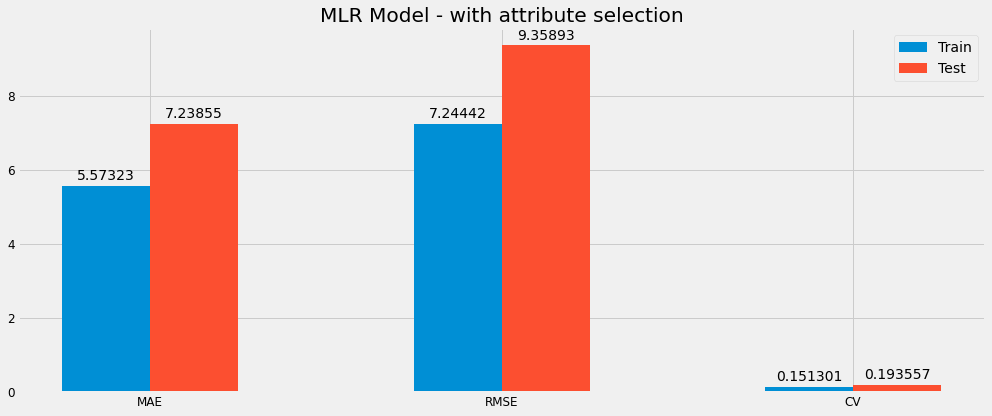

In [24]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "MLR", "with")

### SVR

In [25]:
df=df_extra[[ 'Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month', 'Price - PT [€/MWh]']]

X = df.values[:, :-1] #Features
y = df.values[:, -1] #output

#Normalisation
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [26]:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.2)

params = {'kernel': ('linear','poly','rbf'),
          'C':[0.01,0.1,1,10],
          'gamma': [1e-7, 1e-4, 0.001, 0.1, 1],
          'epsilon':[0.1,0.2,0.3,0.5]}

svr = SVR()

grid_search = GridSearchCV(svr, param_grid=params ,cv=10, n_jobs=-1, verbose=0)
start_time = time.time()
grid_search.fit(train_X, train_y)
exec_time = time.time()-start_time

print(grid_search.best_params_)

model = grid_search.best_estimator_
pred_y = model.predict(test_X)

pred_ytrain = model.predict(train_X)

{'C': 10, 'epsilon': 0.5, 'gamma': 1, 'kernel': 'poly'}


In [27]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 2.86315
Root Mean Squared Error: 4.31599
Coefficient of Variance: 9.02541
************* Test results *************
Mean Absolute Error: 5.23847
Root Mean Squared Error: 6.78573
Coefficient of Variance: 13.96442
R2 0.87876
****************************************
Execution Time: 7.74937


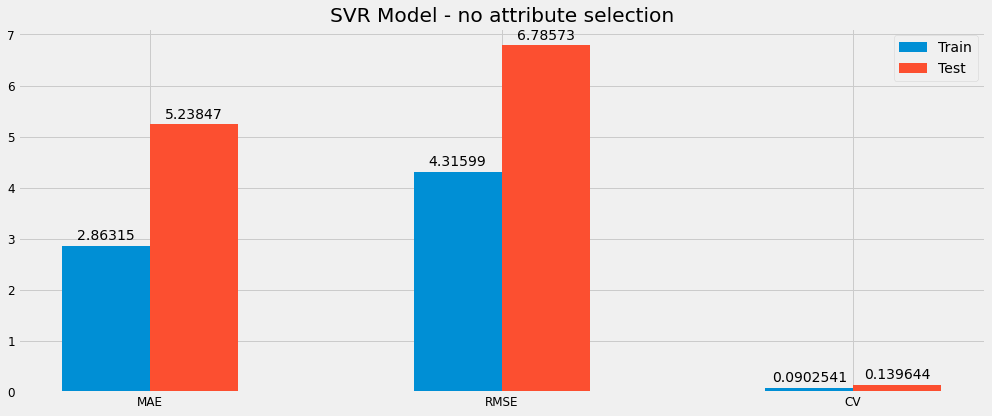

In [28]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "SVR", "no")

Selection d'attributs

In [29]:
svr=SVR()
svr.fit(X, y)

feature_names = np.array(df[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month']].columns)
sfs_forward = SequentialFeatureSelector(svr, n_features_to_select=7, direction='forward').fit(X, y)
print("Features selected by forward sequential selection: "  f"{feature_names[sfs_forward.get_support()]}")
sfs_backward = SequentialFeatureSelector(svr, n_features_to_select=7, direction='backward').fit(X, y)
print("Features selected by backward sequential selection: "  f"{feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection: ['Biomass AA' 'Fossil Hard Coal AC' 'Hydro Pumped Storage AC' 'Other AA'
 'Solar AA' 'holiday' 'weekday']
Features selected by backward sequential selection: ['Biomass AA' 'Fossil Hard Coal AC' 'Hydro Pumped Storage AA'
 'Hydro Pumped Storage AC' 'Other AA' 'Solar AA'
 'Electricity Consumption (MWh)']


In [30]:
#Features selection 
X = sfs_backward.transform(X) 

train_X, test_X, train_y, test_y = train_test_split( X, y, test_size=0.2)

grid_search = GridSearchCV(svr, param_grid=params ,cv=10, n_jobs=-1, verbose=0)
start_time=time.time()
grid_search.fit(train_X, train_y)
exec_time= time.time()-start_time

print(grid_search.best_params_)

model=grid_search.best_estimator_
pred_y=model.predict(test_X)

pred_ytrain=model.predict(train_X)

{'C': 10, 'epsilon': 0.5, 'gamma': 1, 'kernel': 'rbf'}


In [31]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 5.01487
Root Mean Squared Error: 7.06497
Coefficient of Variance: 14.78330
************* Test results *************
Mean Absolute Error: 6.62915
Root Mean Squared Error: 8.81633
Coefficient of Variance: 18.09855
R2 0.66365
****************************************
Execution Time: 6.03841


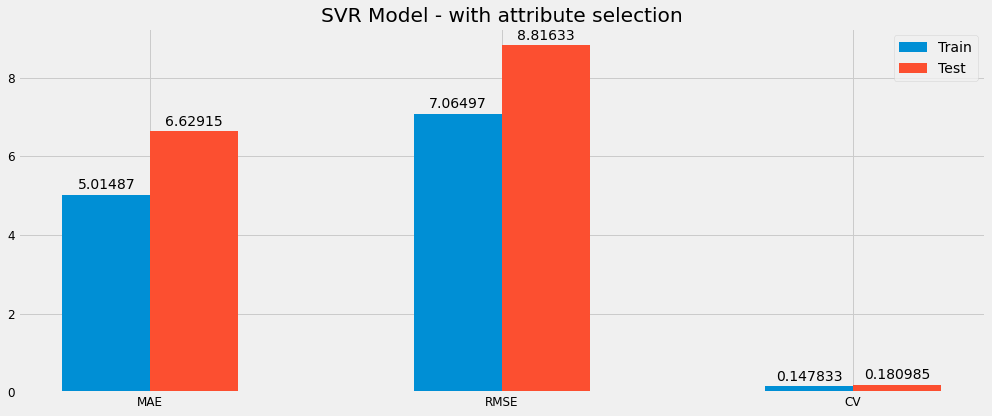

In [32]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "SVR", "with")

RF

In [33]:
df=df_extra[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month','Price - PT [€/MWh]']]

X=df.values[:, :-1] #Features
y=df.values[:, -1] #output

#Normalisation
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [34]:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.2)

#Parameters Tunning
params = { 'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth' : [4,5,6,7,8,10],'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

rf=RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid=params ,cv=10, n_jobs=-1, verbose=0)
start_time = time.time()
grid_search.fit(train_X, train_y)
exec_time = time.time()-start_time

print(grid_search.best_params_)

model=grid_search.best_estimator_
pred_y=model.predict(test_X)

pred_ytrain=model.predict(train_X)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [35]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 1.67828
Root Mean Squared Error: 2.25813
Coefficient of Variance: 4.67594
************* Test results *************
Mean Absolute Error: 4.27134
Root Mean Squared Error: 5.48503
Coefficient of Variance: 11.74131
R2 0.96686
****************************************
Execution Time: 858.72544


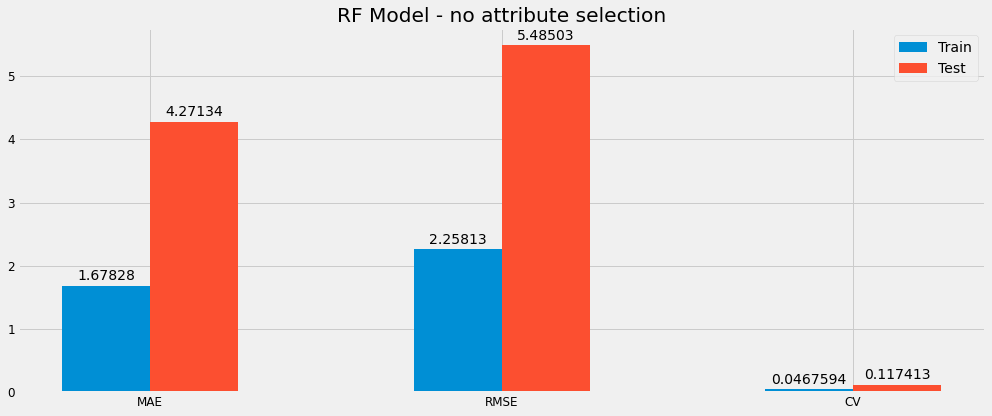

In [36]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "RF", "no")

Selection d'attributs

In [37]:
rf=RandomForestRegressor()
rf.fit(X, y)

feature_names = np.array(df[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month']].columns)
sfs_forward = SequentialFeatureSelector(rf, n_features_to_select=7, direction='forward').fit(X, y)
print("Features selected by forward sequential selection: "  f"{feature_names[sfs_forward.get_support()]}")
sfs_backward = SequentialFeatureSelector(rf, n_features_to_select=7, direction='backward').fit(X, y)
print("Features selected by backward sequential selection: "  f"{feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection: ['Biomass AA' 'Fossil Gas AA' 'Fossil Hard Coal AC'
 'Hydro Pumped Storage AC' 'Other AA' 'holiday' 'month']
Features selected by backward sequential selection: ['Biomass AA' 'Fossil Gas AA' 'Fossil Hard Coal AC'
 'Hydro Pumped Storage AC' 'Hydro Run-of-river and poundage AA'
 'Electricity Consumption (MWh)' 'month']


In [38]:
#Features selection 
X = sfs_backward.transform(X) 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
rf=RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid=params ,cv=10, n_jobs=-1, verbose=0)
start_time=time.time()
grid_search.fit(train_X, train_y)
exec_time= time.time()-start_time

model=grid_search.best_estimator_
pred_y=model.predict(test_X)

print(grid_search.best_params_)

pred_ytrain=model.predict(train_X)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [39]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 1.88927
Root Mean Squared Error: 2.45143
Coefficient of Variance: 5.15172
************* Test results *************
Mean Absolute Error: 4.15135
Root Mean Squared Error: 5.50691
Coefficient of Variance: 11.11826
R2 0.95971
****************************************
Execution Time: 811.79443


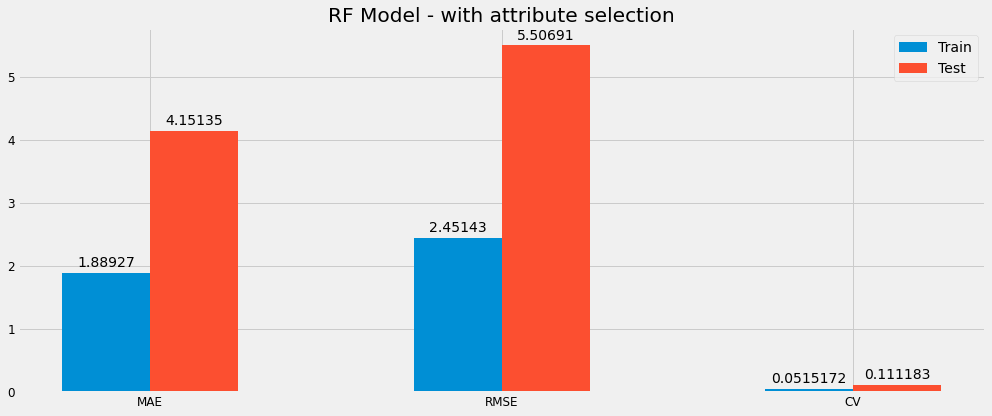

In [40]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "RF", "with")